In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import glob
import json
import re

In [2]:
def json_to_series(filepath):
    with open(filepath, 'r') as f:
        data = json.load(f)
        
        times = data['summary']['times']
        solvs = data['solving']['solvers']
        
        p = re.compile('[0-9]+_data/[0-9]+_(.*).json')
        label = p.search(filepath).group(1)
        
        row = { 
            'label' : label,
            ** { f't_{k}':v for k,v in times.items() },
            ** { f's_{k}':v for k,v in solvs.items() },
        }

        return pd.Series(row)
        


In [3]:
df_igw = pd.DataFrame([json_to_series(s) for s in glob.glob('1_data/*.json')])
df_igw['experiment'] = 'Iron gear wheel'
df_aut = pd.DataFrame([json_to_series(s) for s in glob.glob('2_data/*.json')])
df_aut['experiment'] = 'Automation science pack'
df_sus = pd.DataFrame([json_to_series(s) for s in glob.glob('3_data/*.json')])
df_sus['experiment'] = 'Self sustaining smelter'

df_aut.head()

,label,t_total,t_cpu,t_solve,t_unsat,t_sat,s_choices,s_conflicts,s_conflicts_analyzed,s_restarts,s_restarts_last,experiment
0,parallel-4-split,24.500523,94.228434,23.275786,0.0,23.162103,6537767.0,20012.0,20012.0,121.0,4561.0,Automation science pack
1,default-handy,306.113100,306.076060,301.867122,0.0,301.647832,46573610.0,160677.0,160676.0,603.0,160673.0,Automation science pack
2,default-jumpy,23.806052,23.792755,19.675930,0.0,19.475327,5102450.0,13007.0,12949.0,45.0,12472.0,Automation science pack
3,default-frumpy,1.132111,1.132087,0.139209,0.0,0.050345,1115.0,720.0,718.0,5.0,34.0,Automation science pack
4,default-crafty,227.966100,227.946993,223.486398,0.0,223.263283,350905.0,122811.0,122809.0,15.0,112140.0,Automation science pack


In [4]:
order = ['default-auto',
                   'default-frumpy',
                   'default-jumpy',
                   'default-tweety',
                   'default-handy',
                   'default-crafty',
                   'default-trendy',
                   'default-many',
                   'parallel-4-compete',
                   'parallel-8-compete',
                   'parallel-4-split',
                   'parallel-8-split',
                   'default-auto-domain-heuristics']

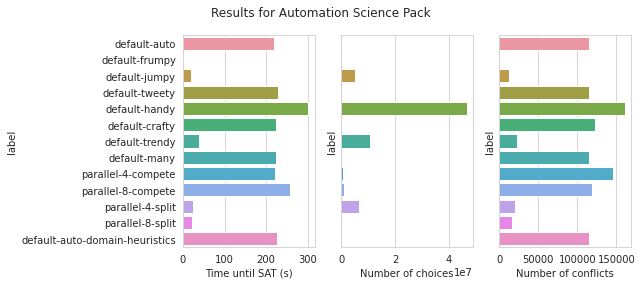

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 4), sharey=True)

sns.barplot(data=df_aut, x='t_sat', y='label',
            order=order,
            ax=ax1)

sns.barplot(data=df_aut, x='s_choices', y='label',
            order=order,
            ax=ax2)

sns.barplot(data=df_aut, x='s_conflicts', y='label',
            order=order,
            ax=ax3)

ax1.set_xlabel('Time until SAT (s)')
ax2.set_xlabel('Number of choices')
ax3.set_xlabel('Number of conflicts')
plt.suptitle('Results for Automation Science Pack')
plt.tight_layout()
plt.savefig('1_plot.pdf')

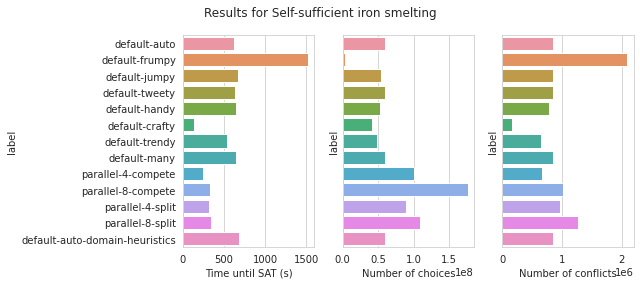

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 4), sharey=True)

sns.barplot(data=df_sus, x='t_sat', y='label',
            order=order,
            ax=ax1)

sns.barplot(data=df_sus, x='s_choices', y='label',
            order=order,
            ax=ax2)

sns.barplot(data=df_sus, x='s_conflicts', y='label',
            order=order,
            ax=ax3)

ax1.set_xlabel('Time until SAT (s)')
ax2.set_xlabel('Number of choices')
ax3.set_xlabel('Number of conflicts')
plt.suptitle('Results for Self-sufficient iron smelting')
plt.tight_layout()
plt.savefig('2_plot.pdf')

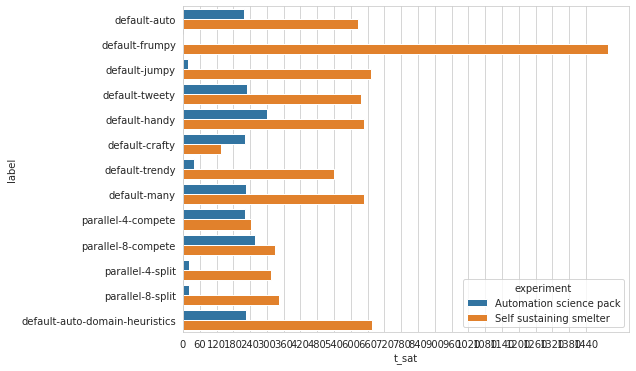

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=pd.concat([df_aut, df_sus]),
            y='label',
            x='t_sat',
            hue='experiment',
            order=['default-auto',
                   'default-frumpy',
                   'default-jumpy',
                   'default-tweety',
                   'default-handy',
                   'default-crafty',
                   'default-trendy',
                   'default-many',
                   'parallel-4-compete',
                   'parallel-8-compete',
                   'parallel-4-split',
                   'parallel-8-split',
                   'default-auto-domain-heuristics'])
ax.set_xticks(range(0, 1500, 60))

In [8]:
df_aut

,label,t_total,t_cpu,t_solve,t_unsat,t_sat,s_choices,s_conflicts,s_conflicts_analyzed,s_restarts,s_restarts_last,experiment
0,parallel-4-split,24.500523,94.228434,23.275786,0.0,23.162103,6537767.0,20012.0,20012.0,121.0,4561.0,Automation science pack
1,default-handy,306.113100,306.076060,301.867122,0.0,301.647832,46573610.0,160677.0,160676.0,603.0,160673.0,Automation science pack
2,default-jumpy,23.806052,23.792755,19.675930,0.0,19.475327,5102450.0,13007.0,12949.0,45.0,12472.0,Automation science pack
3,default-frumpy,1.132111,1.132087,0.139209,0.0,0.050345,1115.0,720.0,718.0,5.0,34.0,Automation science pack
4,default-crafty,227.966100,227.946993,223.486398,0.0,223.263283,350905.0,122811.0,122809.0,15.0,112140.0,Automation science pack
5,default-tweety,228.641725,228.603437,227.419652,0.0,227.319303,317485.0,114534.0,114532.0,391.0,114435.0,Automation science pack
6,parallel-8-split,24.774739,189.313925,23.565999,0.0,22.118477,122064.0,16115.0,16107.0,124.0,4152.0,Automation science pack
7,default-many,224.901344,224.900031,223.676676,0.0,223.575781,317485.0,114534.0,114532.0,391.0,114435.0,Automation science pack
8,default-auto-domain-heuristics,228.340679,228.328784,227.103612,0.0,227.000481,317485.0,114534.0,114532.0,391.0,114435.0,Automation science pack
9,default-trendy,44.001036,43.998107,39.943086,0.0,39.731904,10884686.0,22202.0,22188.0,124.0,21843.0,Automation science pack
